<br><br><br>
<center> <h3 style="color:blue">========================================================</h3> </center>
<center> <h3 style="color:green">Hyperopt Optimization</h3> </center>
<center> <h3 style="color:blue">========================================================</h3> </center>
<br><br><br>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import hyperopt as hyp
from hyperopt import hp
from hyperopt import fmin
from hyperopt import tpe
from hyperopt import rand
from hyperopt import Trials
from hyperopt import STATUS_OK
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

# Define Objective Function

In [2]:
# Define objective function
def f(x):
    return {'loss': x ** 2 - x, 'status': STATUS_OK}

space = hp.uniform('x', -1, 1)

# Run Hyperopt Optimization

In [3]:
# Run hyperopt optimization
trials1 = Trials()
result1 = fmin(
    fn=f,                           # objective function
    space=space,   # parameter space
    algo=tpe.suggest,               # surrogate algorithm
    max_evals=100,                  # no. of evaluations
    trials=trials1                   # trials object that keeps track of the sample results (optional)
)

# Print the optimized parameters
print("\n\n\n==========================================")
print("Result: ",result1)
print("Evalution: ",hyp.space_eval(space, result1))
print("==========================================\n\n\n")

100%|███████████████████████████████████████████| 100/100 [00:00<00:00, 270.94trial/s, best loss: -0.24998650406418382]



Result:  {'x': 0.5036736815071778}
Evalution:  0.5036736815071778





# Plot Loss




     Loss





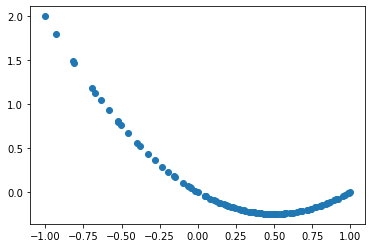

In [4]:
# Extract and plot the trials 
print("\n\n\n===============")
print("     Loss")
print("===============\n\n\n")

x1 = trials1.vals['x']
y1 = [x['loss'] for x in trials1.results]
plt.scatter(x1, y1)
plt.show()

# Run Hyperopt Optimization

In [5]:
# Run hyperopt optimization
trials2 = Trials()
result2 = fmin(
    fn=f,                           # objective function
    space=space,   # parameter space
    algo=rand.suggest,               # surrogate algorithm
    max_evals=100,               # no. of evaluations
    trials=trials2                   # trials object that keeps track of the sample results (optional)
)

# Print the optimized parameters
print("\n\n\n==========================================")
print("Result: ",result2)
print("Evalution: ",hyp.space_eval(space, result2))
print("==========================================\n\n\n")

100%|███████████████████████████████████████████| 100/100 [00:00<00:00, 1333.26trial/s, best loss: -0.2498618534120891]



Result:  {'x': 0.5117535776643072}
Evalution:  0.5117535776643072





# Plot Loss




    Loss





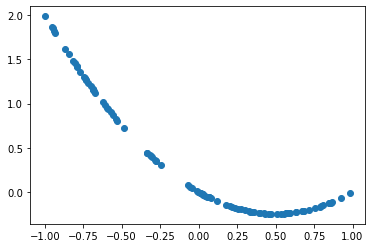

In [6]:
# Extract and plot the trials
print("\n\n\n===============")
print("    Loss")
print("===============\n\n\n")

x2 = trials2.vals['x']
y2 = [x['loss'] for x in trials2.results]
plt.scatter(x2, y2)
plt.show()

# Show Results in Table

In [7]:
tid = []
state = []
vals = []
function_loss = []
algo = []
time = []

for i in range(len(trials1.trials)):
    tid.append(trials1.trials[i]['tid'])
    state.append(trials1.trials[i]['state'])
    function_loss.append(round(trials1.trials[i]['result']["loss"],4))
    vals.append(round(abs(trials1.trials[i]['misc']["vals"]["x"][0]),4))
    algo.append("algo = tpe.suggest, eval = 100")
    time.append(trials1.trials[i]['book_time'])
    
df = pd.DataFrame()
df["Id"] = tid
df["State"] = state
df["Constraints"] = algo
df["Function (Loss)"] = function_loss
df["Accuracy"] = vals
df["Time (sec)"] = time

df['Time (sec)'] = (df['Time (sec)'] - df['Time (sec)'].shift())
my_times = []
for t in df['Time (sec)']:
    my_times.append(t.total_seconds())
df['Time (sec)'] = my_times
df['Time (sec)'].iloc[0] = round(np.mean(my_times[1:]),3)
pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(tabulate(df, df.columns, tablefmt="pretty",showindex="never"))
table1 = df.copy()

In [8]:
tid = []
state = []
vals = []
function_loss = []
algo = []
time = []

for i in range(len(trials2.trials)):
    tid.append(trials2.trials[i]['tid'])
    state.append(trials2.trials[i]['state'])
    function_loss.append(round(trials2.trials[i]['result']["loss"],4))
    vals.append(round(abs(trials2.trials[i]['misc']["vals"]["x"][0]),4))
    algo.append("algo = rand.suggest, eval = 100")
    time.append(trials2.trials[i]['book_time'])
    
df = pd.DataFrame()
df["Id"] = tid
df["State"] = state
df["Constraints"] = algo
df["Function (Loss)"] = function_loss
df["Accuracy"] = vals
df["Time (sec)"] = time

df['Time (sec)'] = (df['Time (sec)'] - df['Time (sec)'].shift())
my_times = []
for t in df['Time (sec)']:
    my_times.append(t.total_seconds())
df['Time (sec)'] = my_times
df['Time (sec)'].iloc[0] = round(np.mean(my_times[1:]),3)
pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(tabulate(df, df.columns, tablefmt="pretty",showindex="never"))
table2 = df.copy()

In [9]:
results = table1.append(table2)
results.to_csv('Hyperopt.csv')
print(tabulate(results, results.columns, tablefmt="pretty",showindex="never"))

+----+-------+---------------------------------+-----------------+----------+------------+
| Id | State |           Constraints           | Function (Loss) | Accuracy | Time (sec) |
+----+-------+---------------------------------+-----------------+----------+------------+
| 0  |   2   | algo = tpe.suggest, eval = 100  |     -0.2422     |  0.4118  |   0.004    |
| 1  |   2   | algo = tpe.suggest, eval = 100  |     1.4874      |  0.8181  |   0.001    |
| 2  |   2   | algo = tpe.suggest, eval = 100  |     -0.1518     |  0.1866  |   0.003    |
| 3  |   2   | algo = tpe.suggest, eval = 100  |     -0.2469     |  0.556   |   0.002    |
| 4  |   2   | algo = tpe.suggest, eval = 100  |     0.7582      |  0.5041  |   0.002    |
| 5  |   2   | algo = tpe.suggest, eval = 100  |     -0.1295     |  0.8471  |   0.002    |
| 6  |   2   | algo = tpe.suggest, eval = 100  |     0.0158      |  0.0155  |   0.002    |
| 7  |   2   | algo = tpe.suggest, eval = 100  |     1.0438      |  0.6374  |   0.002    |

# <br><br><br>
<center> <h3 style="color:blue">========================================================</h3> </center>
<center> <h3 style="color:green">Thank you so much</h3> </center>
<center> <h3 style="color:blue">========================================================</h3> </center>
<br><br><br>